# **Assignment 1: Exploratory Data Analysis (EDA) and Visualization**

Kiva is a platform that facilitates crowdfunding for individuals who lack access to traditional financial services, providing loans to support their livelihoods. Our goal in this analysis is to explore and answer key questions related to Kiva's loan distribution and themes. Specifically, we want to investigate patterns that may help Kiva prioritize investments, inform lenders, and better understand their target communities.


# Theme 1: Loan Distribution


*   Which countries receives the most loans?
*   Is there a gender that is more likely to take out a loan?
*   What are the average, variability, and central tendency of loan amounts across different regions?
*   In the top 10 countries how are loans distributed by gender

# Theme 2: Top loan themes


*   Which loan themes are most common?













In [46]:
import numpy as np # Basic library for all kind of numerical operations
import pandas as pd # Basic library for data manipulation in dataframes
import matplotlib.pyplot as plt # Basic library for data visualization

In [8]:
# Check the version of numpy
print(np.__version__)

1.26.4


In [7]:
# Check the version of pandas
print(pd.__version__)

2.1.4


In [6]:
# Mount Google Drive to the Colab, allowing me to access files from my Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This line sets an environment variable that points to your Kaggle configuration directory, which is necessary to use the Kaggle API.
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [9]:
# That line changes the current directory in the Colab terminal to
%cd /content/drive/MyDrive/GitHub/KIVI

/content/drive/MyDrive/GitHub/KIVI


In [10]:
# It downloads and unzips the Kiva  dataset from Kaggle using the Kaggle API
!kaggle datasets download -d kiva/data-science-for-good-kiva-crowdfunding --unzip

Dataset URL: https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding
License(s): CC0-1.0
 84% 35.0M/41.9M [00:00<00:00, 84.3MB/s]
100% 41.9M/41.9M [00:00<00:00, 88.6MB/s]


In [11]:
# These lines of code read four CSV files related to Kiva loans and store them as Pandas DataFrames.
df_kivi_loans = pd.read_csv("/content/drive/MyDrive/GitHub/KIVI/kiva_loans.csv")
kivi_mpi_region = pd.read_csv("/content/drive/MyDrive/GitHub/KIVI/kiva_mpi_region_locations.csv")
loan_theme_ids_csv = pd.read_csv("/content/drive/MyDrive/GitHub/KIVI/loan_theme_ids.csv")
loan_themes_by_region = pd.read_csv("/content/drive/MyDrive/GitHub/KIVI/loan_themes_by_region.csv")

In [12]:
list(df_kivi_loans.columns)

['id',
 'funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'partner_id',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'tags',
 'borrower_genders',
 'repayment_interval',
 'date']

The essential data for this analysis includes loan amounts, activity, top regions, and borrower gender (both overall and regional). Unnecessary information will be excluded.

In [13]:
list(kivi_mpi_region.columns)

['LocationName',
 'ISO',
 'country',
 'region',
 'world_region',
 'MPI',
 'geo',
 'lat',
 'lon']

This dataset will be excluded from the analysis.

In [14]:
list(loan_theme_ids_csv.columns)

['id', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID']

An analysis of the most frequent loan themes could give valuable insights.

In [15]:
list(loan_themes_by_region.columns)

['Partner ID',
 'Field Partner Name',
 'sector',
 'Loan Theme ID',
 'Loan Theme Type',
 'country',
 'forkiva',
 'region',
 'geocode_old',
 'ISO',
 'number',
 'amount',
 'LocationName',
 'geocode',
 'names',
 'geo',
 'lat',
 'lon',
 'mpi_region',
 'mpi_geo',
 'rural_pct']

This dataset won't be used because it has repeated information.

In [51]:
# Check the first few rows and basic info for each dataset
df_kivi_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614405 entries, 0 to 671200
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       614405 non-null  float64
 1   loan_amount         614405 non-null  float64
 2   activity            614405 non-null  object 
 3   sector              614405 non-null  object 
 4   use                 614400 non-null  object 
 5   country_code        614397 non-null  object 
 6   country             614405 non-null  object 
 7   region              614405 non-null  object 
 8   currency            614405 non-null  object 
 9   partner_id          614405 non-null  float64
 10  posted_time         614405 non-null  object 
 11  disbursed_time      614405 non-null  object 
 12  funded_time         574127 non-null  object 
 13  term_in_months      614405 non-null  float64
 14  lender_count        614405 non-null  int64  
 15  tags                462171 non-null  ob

I will begin by using this dataset and checking the number of entries.

In [48]:
# This line checks for missing values in each column of the DataFrame.
df_kivi_loans.isna().sum()

,0
funded_amount,0
loan_amount,0
activity,0
sector,0
use,5
country_code,8
country,0
region,0
currency,0
partner_id,0


In [50]:
# Removes the 'id' column from the DataFrame.
df_kivi_loans.drop(['id'], axis='columns', inplace=True)

KeyError: "['id'] not found in axis"

In [59]:
# Removes rows with missing values in either the 'borrower_genders' or 'region' columns.
df_kivi_loans.dropna(subset=['borrower_genders', 'country'], inplace=True)

In [53]:
# Filters out rows where the 'borrower_genders' column is not 'male' or 'female', and then counts the occurrences of each gender.
loan_count_by_gender = df_kivi_loans[df_kivi_loans['borrower_genders'].isin(['male', 'female'])]['borrower_genders'].value_counts()

In [20]:
# Display the result
print(loan_count_by_gender)

borrower_genders
female    394369
male      120939
Name: count, dtype: int64


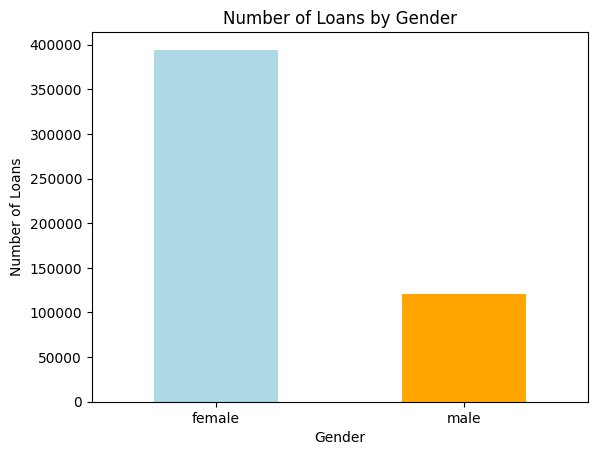

In [21]:
# This code creates a bar plot to visualize the number of loans by gender.
# It specifies the colors for the bars, sets the title and labels, and rotates the x-axis labels for better readability.
# Finally, it displays the plot.

loan_count_by_gender.plot(kind='bar', color=['lightblue','orange'])
plt.title('Number of Loans by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.show()

Summary: Women take significantly more loans than men according to the dataset.

<ipython-input-61-e7909c232146>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  df_kivi_loans['country'].value_counts().head(10).plot(kind='bar', color=plt.cm.get_cmap('tab10').colors)


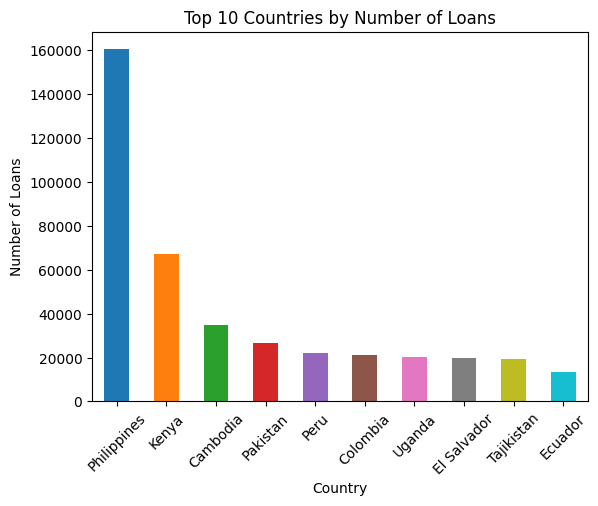

In [61]:
# This code generates a bar plot of the top 10 countries with the most loans
df_kivi_loans['country'].value_counts().head(10).plot(kind='bar', color=plt.cm.get_cmap('tab10').colors)
plt.title('Top 10 Countries by Number of Loans')
plt.xlabel('Country')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

In [23]:
# A dataviz library based on matplotlib, providing a high-level interface for drawing informative statistical graphics.
import seaborn as sns

This section aims to visualize how genders are distributed within the top 10 countries receiving loans.

In [24]:
# This code identifies the top 10 countries and calculates the loan count for males and females in those countries.
top_10_countries = df_kivi_loans['country'].value_counts().head(10).index
gender_by_country = df_kivi_loans[df_kivi_loans['country'].isin(top_10_countries)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().reset_index(name='count')
gender_by_country = gender_by_country[gender_by_country['borrower_genders'].isin(['male', 'female'])]

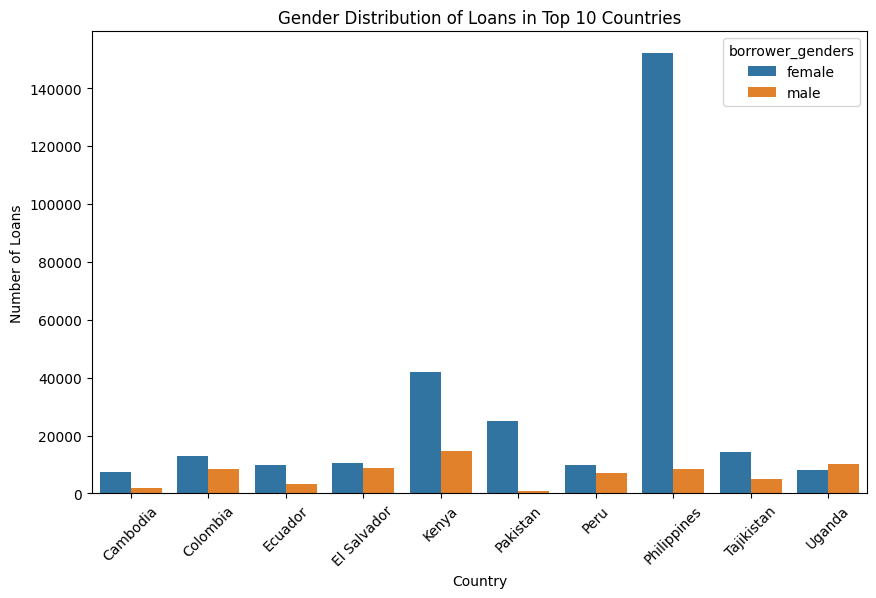

In [25]:
# This code creates a bar plot showing the number of loans by gender in the top 10 countries.
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', hue='borrower_genders', data=gender_by_country)
plt.title('Gender Distribution of Loans in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

In [26]:
# This line creates a new DataFrame containing only data from the Philippines.
philippines_df = df_kivi_loans[df_kivi_loans['country'] == 'Philippines']

In [29]:
# Calculate the mean, median, and variance for the 'funded_amount' column
mean_funded_amount = philippines_df['funded_amount'].mean()
median_funded_amount = philippines_df['funded_amount'].median()
variance_funded_amount = philippines_df['funded_amount'].var()

In [31]:
# Print the results
print("Mean Funded Amount:", mean_funded_amount)
print("Median Funded Amount:", median_funded_amount)
print("Variance of Funded Amount:", variance_funded_amount)

Mean Funded Amount: 339.4725929159391
Median Funded Amount: 275.0
Variance of Funded Amount: 52840.50018736626


In [57]:
# This code displays a summary of the loan_theme_ids_csv DataFrame
loan_theme_ids_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764279 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               764279 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.2+ MB


In [54]:
# This line of code checks for missing values in each column of the DataFrame and returns the sum of missing values per column.
loan_theme_ids_csv.isna().sum()

,0
id,0
Loan Theme ID,0
Loan Theme Type,0
Partner ID,0


In [58]:
# This line removes rows with missing values specifically in the 'Loan Theme Type' column of the DataFrame.
loan_theme_ids_csv.dropna(subset=['Loan Theme Type'], inplace=True)

In [34]:
# Count the number of loans for each theme type
loan_theme_counts = loan_theme_ids_csv['Loan Theme Type'].value_counts()

In [38]:
# Display the top 5 most common loan themes
print('Most Common Loan Themes:')
print(loan_theme_counts.head(5))

Most Common Loan Themes:
Loan Theme Type
General            380693
Underserved         62575
Agriculture         40108
Rural Inclusion     21228
Water               20131
Name: count, dtype: int64


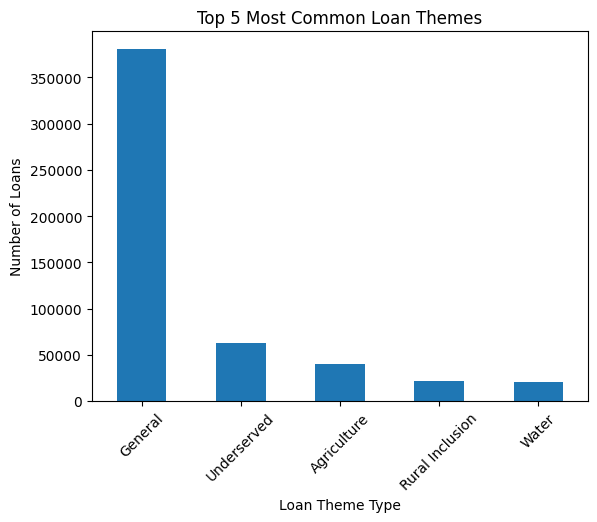

In [45]:
# Here I plot the result for better visualization
loan_theme_counts.head(5).plot(kind='bar')
plt.title('Top 5 Most Common Loan Themes')
plt.xlabel('Loan Theme Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()